## **AdaBoost (SAMME & R2)**
Следующим мощным алгоритмом машинного обучения является AdaBoost (adaptive boosting), в основе которого лежит концепция бустинга, когда слабые базовые модели последовательно объединяются в одну сильную, исправляя ошибки предшественников.

В AdaBoost в качестве базовой модели используется пень решений (могут использоваться другие модели) — дерево с небольшой глубиной, которому присваивается вектор весов размера N, каждое значение которого соответствует определённому значению y_train и изначально равно $\frac{1}{N}$, где N — количество образцов в обучающей выборке. Каждый следующий пень обучается с учётом весов, рассчитанных на основе ошибок предыдущего прогноза. Также для каждого обученного пня отдельно рассчитывается вес, используемый для оценки важности итоговых прогнозов.


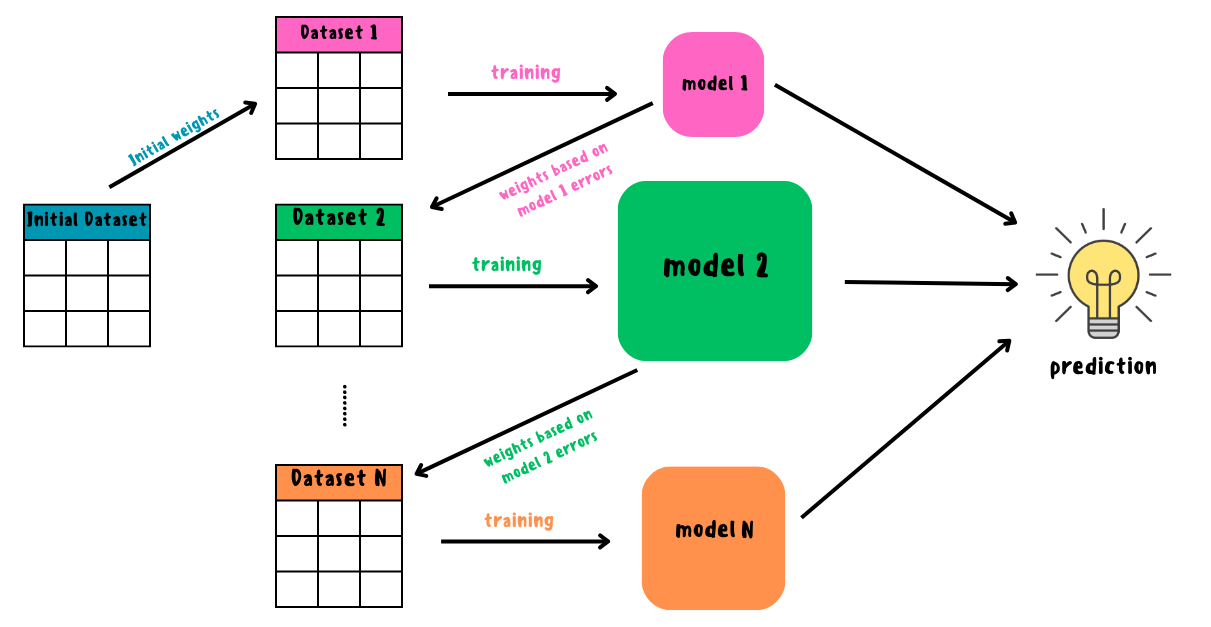

### **Принцип работы адаптивного бустинга для классификации**
**SAMME** (Stagewise Additive Modeling using а Multiclass Exponential loss function) — версия AdaBoost для многоклассовой классификации. Если же базовые модели оценивают вероятности классов, то такая версия называется *SAMME.R*, где R (Real) — вещественный и, в целом, обладает более высокой точностью.

**Алгоритм строится следующим образом**:
- 1) каждому значению y_train присваивается одинаковый вес;
- 2) пень глубиной 1 обучается на X_train и вычисляется доля неверных прогнозов, на основе которой рассчитывается взвешенная частота ошибки;
- 3) на основе взвешенной частоты ошибки рассчитывается вес пня;
- 4) для неверных прогнозов обновляются (увеличиваются) и нормализуются веса с учётом веса пня;
- 5) следующий пень обучается на X_train с учётом обновлённых весов: строится новая выборка того же размера, в которой чаще будут встречаться неправильно классифицированные образцы (те, у которых больше веса);
- 6) шаги 2-5 повторяются для каждого пня;
- 7) каждый обученный пень делает прогноз 1 образца X_test;
- 8) далее для каждого предсказанного класса суммируются веса пней;
- 9) класс с максимальной суммой весов и будет конечным прогнозом;
- 10) данная процедура повторяется для всех образцов в тестовом наборе данных.

**Формулы для расчётов**

$r_j = \sum\limits_{i=1}^{m} w_i (\hat{y_j}^{(i)} \neq {y}^{(i)}) \ - \ $ weighted error rate of $j^{th}$ stump

$α_j = η \ log(\frac{1 - r_j}{r_j}) + log(K - 1) \ - \ $ stump weight

$set \ $ $w^{(i)} \leftarrow w^{(i)} exp(α_j) \ (\hat{y_j}^{(i)} \neq {y}^{(i)}) \ and \  normalize $

$\hat{y}(x) = argmax \sum\limits_{j=1}^{N} α_j (\hat{y}_j(x) = k) \ - \ $ prediction

$\hat{y_j}^{(i)} \ - \ $  $j^{th} \ $ prediction for $i^{th} \ $ sample

$η \ - \ $ learning rate

$K \ - \ $ number of classes

### **Принцип работы адаптивного бустинга для регрессии**
В случае регрессии *AdaBoost.R2* работает похожим образом за исключением некоторых особенностей: для оценки качества прогнозов пней используется абсолютная ошибка, а конечный прогноз выполняется с помощью [взвешенной медианы](https://iq.opengenus.org/weighted-median-problem/), суть которой заключается в присвоении весов отсортированным элементам списка и выборе того, чья кумулятивная сумма больше половины от общей.

**Алгоритм строится следующим образом**:
- 1) каждому значению y_train присваивается одинаковый вес;
- 2) пень глубиной 3 обучается на X_train и вычисляется абсолютная ошибка для каждого спрогнозированного образца;
- 3) после рассчитываются скорректированные ошибки для образов и пня, а также коэффициент $β$ на их основе;
- 4) на основе коэффициента $β$ находится вес пня;
- 5) далее для всех образцов обновляются и нормализуются веса с учётом веса пня;
- 6) следующий пень обучается на X_train с учётом обновлённых весов: строится новая выборка того же размера, в которой чаще будут встречаться образцы с большими весами;
- 7) шаги 2-6 повторяются для каждого пня;
- 8) производится прогноз всех образцов X_test на каждом обученном пне;
- 9) производится поиск индекса медианного прогноза для каждого образца;
- 10) прогнозы из шага 8 на основе индексов медианного прогноза для каждого образца и будут конечными прогнозами.


**Формулы для расчётов**

$e_{abs} = |\hat{y_j}^{(i)} - {y}^{(i)}| \ - \ $ absolute instance error

$e_{l} = \frac{e_{abs}}{max(e_{abs})} \ - \ $ adjusted instance errors

$\overline{e} = \sum\limits_{i=1}^{n} w^{(i)} e_l^{(i)} \ - \ $ adjusted stump error

$β = \frac{\overline{e}}{1 - \overline{e}}$

$w^{(i)} = η \ ln(\frac{1}{β})$

$update \ $ $w^{(i)} \leftarrow w^{(i)} β_i^{1 - e_{l}} \ and \ normalize$

$\hat{y}(x) = weighted \ median (\hat{y_j}^{(i)}) \ - \ $ prediction

$\hat{y_j}^{(i)} \ - \ $  $j^{th} \ $ prediction for $i^{th} \ $ sample

$η \ - \ $ learning rate

### **Реализация на Python с нуля**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from mlxtend.plotting import plot_decision_regions

In [ ]:
class AdaBoost:
    def __init__(self, regression=False, n_estimators=50, learning_rate=1.0, random_state=0):
        self.regression = regression
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.stumps = []
        self.weights = []

    def _update_weights(self, args):
        if self.regression:
            weights, beta, loss_function = args
            weights *= beta ** (1 - loss_function)
        else:
            weights, wrong_predictions, stump_weight = args
            weights[wrong_predictions] *= np.exp(stump_weight)

        return weights

    @staticmethod
    def _normalize(weights: np.ndarray):
        return weights / sum(weights)

    def fit(self, X, y):
        n_samples = len(y)
        self.K = len(np.unique(y.values))   # num unique classes
        weights = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            if self.regression:
                stump = DecisionTreeRegressor(max_depth=3, random_state=self.random_state)
                stump_predictions = stump.fit(X, y, sample_weight=weights).predict(X)

                abs_instance_errors = abs(stump_predictions - y)
                adjusted_instance_errors = abs_instance_errors / max(abs_instance_errors)
                adjusted_stump_error = sum(weights * adjusted_instance_errors)

                if adjusted_stump_error >= 0.5:
                    self.stumps.pop(-1)
                    break

                beta = adjusted_stump_error / (1 - adjusted_stump_error)
                stump_weight = self.learning_rate * np.log(1 / beta)
                args = [weights, beta, adjusted_instance_errors]
            else:
                stump = DecisionTreeClassifier(max_depth=1, random_state=self.random_state)
                stump_predictions = stump.fit(X, y, sample_weight=weights).predict(X)

                wrong_predictions = stump_predictions != y
                r = sum(weights[wrong_predictions])   # weighted_error_rate
                stump_weight = self.learning_rate * np.log((1 - r) / r) + np.log(self.K - 1)
                args = [weights, wrong_predictions, stump_weight]

            self.stumps.append(stump)
            self.weights.append(stump_weight)
            weights= self._update_weights(args)
            weights = self._normalize(weights)

    def _max_weighted_votes(self, samples):
        n_samples = len(samples)
        sample_indexes = np.array(range(n_samples))
        prediction_weights = np.zeros((n_samples, self.K))

        for i in range(self.n_estimators):
            stump_prediction = self.stumps[i].predict(samples)
            prediction_weights[sample_indexes, stump_prediction] += self.weights[i]

        return np.argmax(prediction_weights, axis=1)

    def _weighted_median_prediction(self, samples):
        n_samples = len(samples)
        sample_indexes = np.arange(n_samples)
        predictions = np.array([stump.predict(samples) for stump in self.stumps]).T
        sorted_pred_indexes = np.argsort(predictions, axis=1)

        # Find index of median prediction for each sample
        cumsum_weights = np.array(self.weights)[sorted_pred_indexes].cumsum(axis=1)
        is_over_median = cumsum_weights >= 0.5 * sum(self.weights)   # True/False matrix
        median_indexes = is_over_median.argmax(axis=1)
        median_prediction_indexes = sorted_pred_indexes[sample_indexes, median_indexes]

        return predictions[sample_indexes, median_prediction_indexes]

    def predict(self, samples):
        if self.regression:
            return self._weighted_median_prediction(samples)
        else:
            return self._max_weighted_votes(samples)

In [ ]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train.values[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train.values)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

### **Загрузка датасетов**
Для обучения моделей будет использован [Glass Classification](https://www.kaggle.com/datasets/uciml/glass) датасет, где необходимо верно определить тип стекла по его признакам. В случае регрессии используется Diabetes датасет из scikit-learn.

In [ ]:
df_path = "/content/drive/MyDrive/glass.csv"
glass_df = pd.read_csv(df_path)
X1, y1 = glass_df.iloc[:, :-1], glass_df.iloc[:, -1]
y1 = pd.Series(LabelEncoder().fit_transform(y1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)
print(glass_df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [ ]:
X2, y2 = load_diabetes(return_X_y=True, as_frame=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)
print(X2, y2, sep='\n')

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

### **Обучение моделей и оценка полученных результатов**
В случае классификации низкая точность обусловлена тем, что AdaBoost плохо работает с несбалансированными данными, стараясь минимизировать ошибку на объектах из меньшего класса, что часто приводит к переобучению на этих объектах и к снижению точности модели в целом.

В случае регрессии ошибка меньше, чем в алгоритме случайного леса так как в используемых данных наблюдается относительно высокая степень корреляции между признаками, с которой AdaBoost справляется лучше. Следует отметить, что большинстве случаев, при хорошей подготовке данных AdaBoost будет справляться лучше своих предшественников как в задачах регрессии, так и классификации. Данный пример хорошо показывает, что более сильные алгоритмы способны далеко не всегда показывать лучшие результаты "из коробки".

Полученные результаты приведены ниже.


**Классификация**

adaboost_clf_accuracy: 0.46296296296296297
[5 0 0 3 1 0 0 0 0 0 1 0 1 1 0 5 0 0 0 0 1 0 5 5 1 0 5 0 0 0 0 4 0 1 0 0 0
 0 0 5 1 4 0 0 0 0 0 0 0 0 0 1 5 0]

sk_adaboost_clf_accuracy: 0.46296296296296297
[5 0 0 3 1 0 0 0 0 0 1 0 1 1 0 5 0 0 0 0 1 0 5 5 1 0 5 0 0 0 0 4 0 1 0 0 0
 0 0 5 1 4 0 0 0 0 0 0 0 0 0 1 5 0]


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


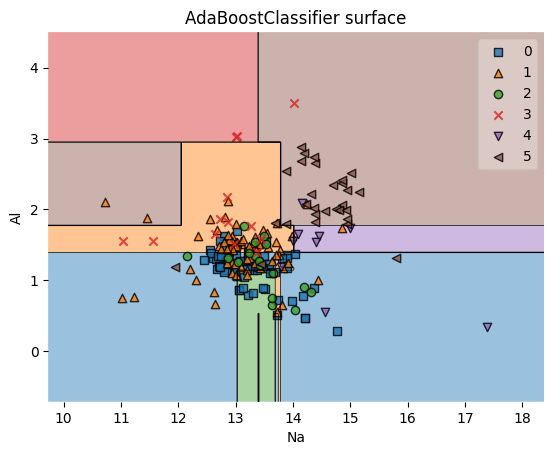

In [ ]:
adaboost_clf = AdaBoost(random_state=0)
adaboost_clf.fit(X1_train, y1_train)
adaboost_clf_pred_res = adaboost_clf.predict(X1_test)
adaboost_clf_accuracy = accuracy_score(adaboost_clf_pred_res, y1_test)
print(f'adaboost_clf_accuracy: {adaboost_clf_accuracy}')
print(adaboost_clf_pred_res, '', sep='\n')

sk_adaboost_clf = AdaBoostClassifier(random_state=0, algorithm='SAMME')
sk_adaboost_clf.fit(X1_train, y1_train)
sk_adaboost_clf_pred_res = sk_adaboost_clf.predict(X1_test)
sk_adaboost_clf_accuracy = accuracy_score(sk_adaboost_clf_pred_res, y1_test)
print(f'sk_adaboost_clf_accuracy: {sk_adaboost_clf_accuracy}')
print(sk_adaboost_clf_pred_res)

feature_indexes = [1, 3]
title1 = 'AdaBoostClassifier surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_adaboost_clf, feature_indexes, title1)

**Регрессия**

In [ ]:
adaboost_reg = AdaBoost(regression=True, random_state=0)
adaboost_reg.fit(X2_train, y2_train)
adaboost_reg_pred_res = adaboost_reg.predict(X2_test)
mape = mean_absolute_percentage_error(adaboost_reg_pred_res, y2_test)
print(f'adaboost_mape {mape}')
print(adaboost_reg_pred_res, '', sep='\n')

sk_adaboost_reg = AdaBoostRegressor(random_state=0, loss='linear')
sk_adaboost_reg.fit(X2_train, y2_train)
sk_adaboost_reg_pred_res = sk_adaboost_reg.predict(X2_test)
sk_mape = mean_absolute_percentage_error(sk_adaboost_reg_pred_res, y2_test)
print(f'sk_adaboost_mape {sk_mape}')
print(sk_adaboost_reg_pred_res)

adaboost_mape 0.31162122370993556
[239.42353344 230.0610339  167.83786364 109.90928178 184.64646203
 239.42353344 101.90476455 212.98494882 140.80423233 234.56903421
 149.26846999 194.19445742 117.43386255 108.94790608 242.1290679
 113.80597432 154.09826483  98.94335581 115.9061429  215.42377993
 174.95712248 153.4188609  156.40651525 101.90476455 212.98494882
 167.10327877 124.65270476 101.84145017 192.87682861 155.83747832
 199.62919177 101.90476455 117.43386255 149.26846999 149.26846999
 154.09826483 153.4188609  154.49247636 101.3830624  209.29518647
 109.90928178 161.72545559 157.26677336 164.34687775 194.42677031
 101.84145017 121.14501461 138.47917841 118.20881026 221.76239616
 142.75885825 106.54153274 115.59244578 156.73838581 228.18233286
 159.23529268 188.06281057 115.59244578 136.36747076 179.90046612
 235.54909423 136.36747076 146.94594595 117.30376558 235.54909423
 156.55259315 109.14947399 222.75       216.80587827 117.30376558
 101.3830624  149.26846999 124.65270476 138

### **Преимущества и недостатки AdaBoost**
Преимущества:
- высокая точность при правильной подготовке данных;
- работа со сложными, нелинейными зависимостями в данных;
- высокая обобщающая способность.

Недостатки:
 - низкая скорость обучения при работе с большими датасетами;
 - склонен к переобучению при большом числе базовых моделей;
 - нестабильность при работе с несбалансированными данными, а также чувствительность к шуму и выбросам.

### **Другие модификации адаптивного бустинга**
Поскольку при работе с зашумленными данными обобщающая способность AdaBoost может заметно снизиться, были разработаны другие, более стабильные модификации. Среди наиболее интересных можно выделить следующие:
- **L2-Boost** — модификация, которая использует L2-регуляризацию для функции потерь для штрафов менее важных признаков, что делает его более подходящим вариантом в задачах регрессии;
- **LogitBoost** — улучшение, которое применяется в задачах классификации на основе логистической функции потерь, что ускоряет обучение и в ряде случаев делает алгоритм более устойчивым;
- **BrownBoost** — более продвинутая модификация, в основе которой лежит использование лимита на обучение по данным с неверными прогнозами, то есть модель старается штрафовать сильнее трудно классифицируемые объекты.

### **Дополнительные источники**
Статьи:
- «Multi-class AdaBoost», Ji Zhu, Hui Zou, Saharon Rosset and Trevor Hastie;
- «Boosting for Regression Transfer», David Pardoe and Peter Stone;
- «L2 Boosting for Economic Applications», Ye Luo and Martin Spindler;
- «Robust LogitBoost and Adaptive Base Class (ABC) LogitBoost», Ping Li;
- «An adaptive version of the boost by majority algorithm», Yoav Freund.

Документация:
- [описание AdaBoost](https://scikit-learn.org/stable/modules/ensemble.html#adaboost);
- [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html);
- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html).

Видео: [один](https://www.youtube.com/watch?v=LsK-xG1cLYA&t=1110s&ab_channel=StatQuestwithJoshStarmer), [два](https://www.youtube.com/watch?v=UHBmv7qCey4&t=1477s), [три](https://www.youtube.com/watch?v=toOAToTaGV4).
